In [15]:
pip install -U numpy==1.19.2
#版本不兼容

SyntaxError: invalid syntax (Temp/ipykernel_9556/3994638311.py, line 1)

(1596, 7)
0


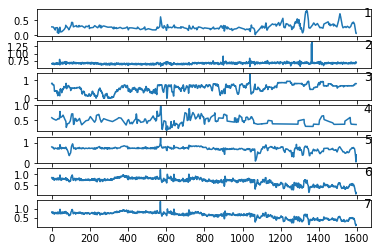

In [6]:
from matplotlib import pyplot
import numpy as np
a=np.loadtxt('train_input.txt',dtype=np.float32)
#b=np.loadtxt('output.csv',dtype=np.float32)
print(a.shape)
#print(b.shape)
k=0
for i in range(len(a)):   
    for j in range(len(a[i])):
        if np.isnan(a[i][j]):
            #print(i,j)
            a[i][j]=0
            k=k+1
print(k)
#x_train=np.swapaxes(a,1,2)
# 指定要绘制的列
groups = [0, 1, 2, 3, 4, 5, 6]
i = 1
# 绘制每一列
pyplot.figure()
for group in groups:
    pyplot.subplot(len(groups), 1, i)
    pyplot.plot(a[:, group])
    pyplot.title(group+1, y=0.5, loc='right')
    i += 1
pyplot.show()

In [1]:
# 加载数据集
from pandas import read_csv
from matplotlib import pyplot
import numpy as np
import sklearn
from math import sqrt
from numpy import concatenate
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

a=np.loadtxt('Btrain_input.txt',dtype=np.float32)
b=np.loadtxt('Btrain_output.txt',dtype=np.float32)
b = b[:,np.newaxis]
values=np.concatenate((b,a),axis=1)

# 将序列转换成监督学习问题
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

# 归一化特征
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# 构建监督学习问题
reframed = series_to_supervised(scaled, 1, 1)
# 丢弃我们不想预测的列
reframed.drop(reframed.columns[[9,10,11,12,13,14,15]], axis=1, inplace=True)
print(reframed.head())
# 把数据分为训练集和测试集
values = reframed.values
n_train_hours = 1000
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# 把数据分为输入和输出
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# 把输入重塑成3D格式 [样例， 时间步, 特征]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
# 设计网络
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# 拟合网络
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# 绘制历史数据
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()
# 作出预测
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# 反向缩放预测值
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# 反向转换实际值比例
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# 计算RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

OSError: Btrain_output.txt not found.

52
(800, 8)
(799, 16)
(583, 8) (799, 8)
(1000, 7) (1000,) (583, 7) (583,) (799, 7) (799,)
(1000, 1, 7) (1000,) (583, 1, 7) (583,) (799, 1, 7) (799,)
Epoch 1/50
14/14 - 0s - loss: 0.1693 - val_loss: 0.1380
Epoch 2/50
14/14 - 0s - loss: 0.0841 - val_loss: 0.1381
Epoch 3/50
14/14 - 0s - loss: 0.0656 - val_loss: 0.1298
Epoch 4/50
14/14 - 0s - loss: 0.0701 - val_loss: 0.1300
Epoch 5/50
14/14 - 0s - loss: 0.0694 - val_loss: 0.1308
Epoch 6/50
14/14 - 0s - loss: 0.0676 - val_loss: 0.1304
Epoch 7/50
14/14 - 0s - loss: 0.0683 - val_loss: 0.1304
Epoch 8/50
14/14 - 0s - loss: 0.0681 - val_loss: 0.1304
Epoch 9/50
14/14 - 0s - loss: 0.0682 - val_loss: 0.1303
Epoch 10/50
14/14 - 0s - loss: 0.0682 - val_loss: 0.1304
Epoch 11/50
14/14 - 0s - loss: 0.0682 - val_loss: 0.1304
Epoch 12/50
14/14 - 0s - loss: 0.0682 - val_loss: 0.1304
Epoch 13/50
14/14 - 0s - loss: 0.0682 - val_loss: 0.1304
Epoch 14/50
14/14 - 0s - loss: 0.0682 - val_loss: 0.1304
Epoch 15/50
14/14 - 0s - loss: 0.0682 - val_loss: 0.1304
Epoch

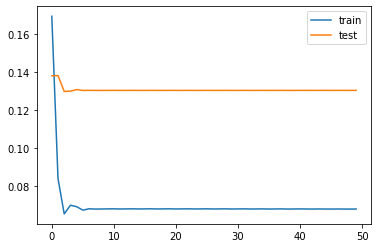

(799, 1)
(799, 7)
(799, 8)


D:\Programs\anaconda\lib\site-packages\xlsxwriter\workbook.py:336: UserWarning: Calling close() on already closed file.
  warn("Calling close() on already closed file.")


In [2]:
# 加载数据集
import pandas as pd
from pandas import read_csv
from matplotlib import pyplot
import numpy as np
import sklearn
from math import sqrt
from numpy import concatenate
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

a=np.loadtxt('train_input.txt',dtype=np.float32)
b=np.loadtxt('Btrain_output.txt',dtype=np.float32)
c=np.loadtxt('Btest_input.txt',dtype=np.float32)
d=np.ones([798,1], dtype = int)
b = b[:,np.newaxis]
k=0
for i in range(len(c)):   
    for j in range(len(c[i])):
        if np.isnan(c[i][j]):
            #print(i,j)
            c[i][j]=0
            k=k+1
print(k)
#将训练集最后一行作为测试集第一行
values=np.concatenate((b,a),axis=1)
g = a[1595]
g = g[np.newaxis,:]
f = b[1595]
f = f[np.newaxis,:]
e=np.concatenate((g,c),axis=0)
f=np.concatenate((f,d),axis=0)
h = c[797]
h = h[np.newaxis,:]
i = d[797]
i = i[np.newaxis,:]
e=np.concatenate((e,h),axis=0)
f=np.concatenate((f,i),axis=0)
values2=np.concatenate((f,e),axis=1)
print(values2.shape)
# 将序列转换成监督学习问题
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

# 归一化特征
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
scaled2 = scaler.fit_transform(values2)
# 构建监督学习问题
reframed = series_to_supervised(scaled, 1, 1)
reframed2 = series_to_supervised(scaled2, 1, 1)
print(reframed2.shape)
# 丢弃我们不想预测的列
reframed.drop(reframed.columns[[9,10,11,12,13,14,15]], axis=1, inplace=True)
#print(reframed.head())
reframed2.drop(reframed2.columns[[9,10,11,12,13,14,15]], axis=1, inplace=True)
#print(reframed2.head())
# 把数据分为训练集和测试集
values = reframed.values
n_train_hours = 1000
train = values[:n_train_hours, 1:]
test = values[n_train_hours:, 1:]
test2 = reframed2.values[:,1:]
print(test.shape,test2.shape)
# 把数据分为输入和输出
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
test_X2, test_y2 = test2[:, :-1], test2[:, -1]
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape,test_X2.shape,test_y2.shape)
# 把输入重塑成3D格式 [样例， 时间步, 特征]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
test_X2 = test_X2.reshape((test_X2.shape[0], 1, test_X2.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape,test_X2.shape,test_y2.shape)
# 设计网络
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# 拟合网络
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# 绘制历史数据
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()
# 作出预测
yhat = model.predict(test_X2)
print(yhat.shape)
test_X2 = test_X2.reshape((test_X2.shape[0], test_X2.shape[2]))
print(test_X2.shape)
# 反向缩放预测值
inv_yhat = concatenate((yhat, test_X2[:,:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:]
print(inv_yhat.shape)
data = pd.DataFrame(inv_yhat)
writer = pd.ExcelWriter('TEST.xlsx')
data.to_excel(writer, 'page_1', float_format='%.5f')		# ‘page_1’是写入excel的sheet名
writer.save()
writer.close()